## Clustering the Iris Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df_iris = pd.read_csv(url, header=None, names=["Sepal Length","Sepal Width","Petal Length","Petal Width","Name"])
df_iris

df_iris_k = df_iris


Clustering Data with k-Means

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Name          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Scatter plot matrix between all features
df_iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


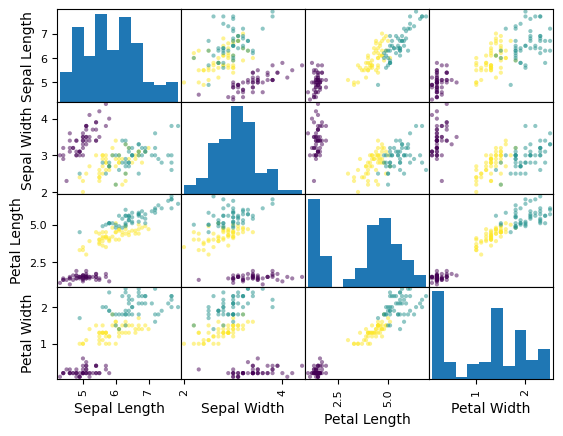

In [5]:
ar1 = df_iris['Name'].to_numpy()
ar1[ar1=='Iris-setosa'] = 0
ar1[ar1=='Iris-virginica'] = 1
ar1[ar1 == 'Iris-versicolor'] = 2
#ar1
scatter1 = pd.plotting.scatter_matrix(df_iris,c=ar1)
#labels = ['Iris-setosa','Iris-virginica','Iris-vericolor']
ar2 = df_iris['Sepal Length'].to_numpy()
ar3 = df_iris['Sepal Width'].to_numpy()
ar4 = df_iris['Petal Length'].to_numpy()
ar5 = df_iris['Petal Width'].to_numpy()
#scatter1.legend(labels)
#x = plt.scatter(ar1,ar2,c="red")
#x

In [6]:
df_iris2 = df_iris.drop('Name',axis=1)
df_iris2

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# Clustering the data using k-Means clustering

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
scaled_features = df_iris_k['Name'] = encoder.fit_transform(df_iris_k['Name'])
df = df_iris_k.to_numpy()
#X = df[:,:4]
#Y = df[4:,4]
X = df_iris_k['Petal Length']
Y = df_iris_k['Petal Width']
plot1 = plt.scatter(X,Y, c=df_iris['Name'],cmap='viridis')
plt.xlabel('Petal Length', fontsize=12)
plt.ylabel('Petal Width', fontsize=12)
plt.legend(*plot1.legend_elements(), loc="lower right", title="Names")

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
kmean = KMeans(n_clusters = 3).fit(df_iris)
#kmean
centroids = kmean.cluster_centers_
#centroids
plt.scatter(X,Y, c=kmean.labels_)
#plt.scatter(centroids[:,0], centroids[:,1], c='red')


NameError: name 'X' is not defined

The three classes are pretty equally separated

In [ ]:
# Cross-tabulation of actual class values and cluster labels

labels1 = kmean.labels_
fig, axes = plt.subplots(1,2,figsize=(16,8))

axes[0].scatter(X,Y, c=labels1,cmap="jet")
axes[1].scatter(X, Y, c=labels1,cmap="jet")

axes[0].set_title("Actual")
axes[1].set_title("Predicted")

In [9]:
df_lw = pd.DataFrame(df_iris, columns=["Sepal Length", "Sepal Width","Petal Length","Petal Width"])
df_target = pd.DataFrame(df_iris, columns=["Name"])
# plt.figure(figsize=(16,8))


# plt.scatter(df_lw['Petal Length'], df_lw['Petal Width'],c=Y, s= 40)

Text(0.5, 1.0, 'Predicted')

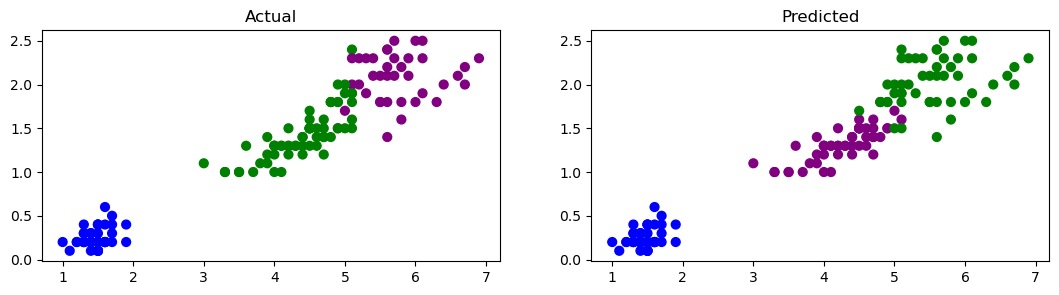

In [10]:
model = KMeans(n_clusters=3)
model.fit(df_lw)
#print(model.labels_)
plt.figure(figsize=(13,3))
colors = np.array(["blue","green","purple"])

p_predict =np.choose(model.labels_,[1,0,2]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(df_lw["Petal Length"], df_lw["Petal Width"], c=colors[p_predict], s=40)
plt.title("Actual")
plt.subplot(1,2,2)
plt.scatter(df_lw["Petal Length"], df_lw["Petal Width"], c=colors[df_target['Name']], s=40)
plt.title("Predicted")



A few instances about 10 belong to incorrect clusters. Cluster in the bottom left appears to correspond perfectly. The scatter plot agrees with what is observed from the scatter plot matrix.

Hierarchical Clustering of Features

In [124]:
# Calculating mutual information between all pairs of features
from sklearn import feature_selection

mutual_info = feature_selection.mutual_info_regression(df_lw,df_target['Name'])
mutual_info

result_names = df_lw.columns
mutual_info_df = pd.DataFrame({'Attribute': result_names, 'Mutual info': mutual_info})
mutual_info_df

,Attribute,Mutual info
0,Sepal Length,0.481164
1,Sepal Width,0.288947
2,Petal Length,0.984682
3,Petal Width,1.044803


In [155]:
# Dendrogram from the mutual information DataFrame
model = AgglomerativeClustering(n_clusters=3)
model = model.fit(df_lw)
model

AgglomerativeClustering(n_clusters=3)

KeyError: -115

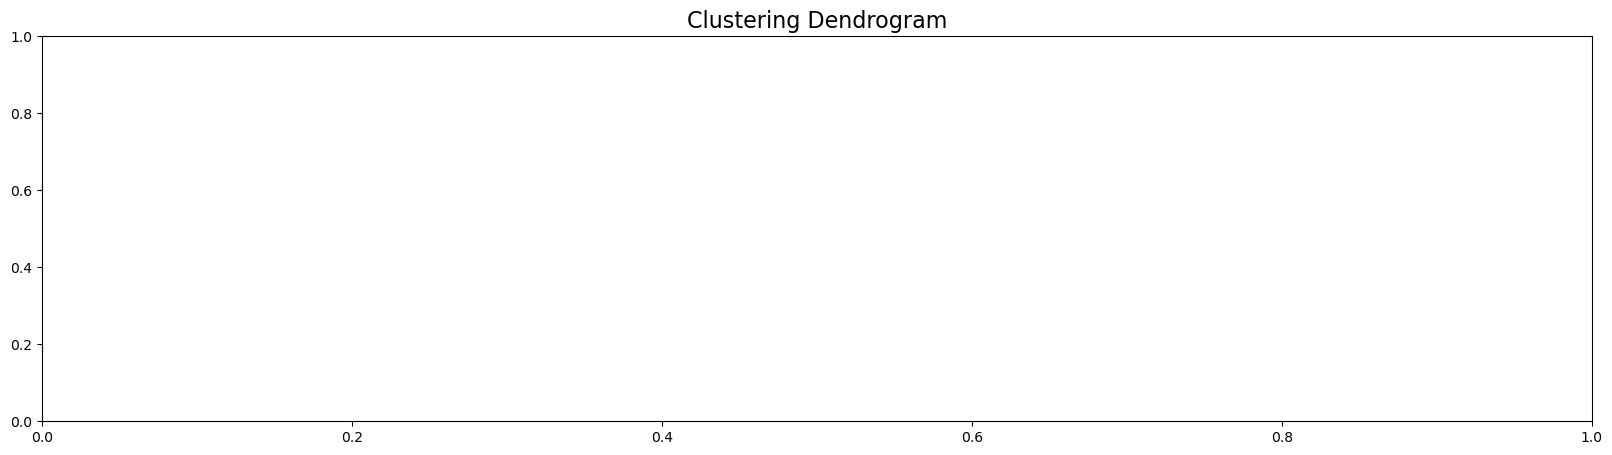

In [185]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    children = model.children_
    dist = np.arange(children.shape[0]) + 1
    n_obs = np.arange(2, children.shape[0] + 2)
    linkage_matrix = np.column_stack([children, dist, n_obs])
    dendrogram(linkage_matrix.astype(float), **kwargs)

figure = plt.figure(figsize=(20,5)) 
plt.title("Clustering Dendrogram", fontsize=16)
plot_dendrogram(model, labels=df_target, orientation="right", leaf_font_size=9)



In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

df_iris.set_index('Name')
df_iris.reset_index(drop=True)
#df_iris.head()

plt.title("Clustering Dendrogram")
Z = linkage(df_iris,"ward")

den = dendrogram(Z, labels=df_iris.index)
plt.show()

In [186]:
df_lw

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
